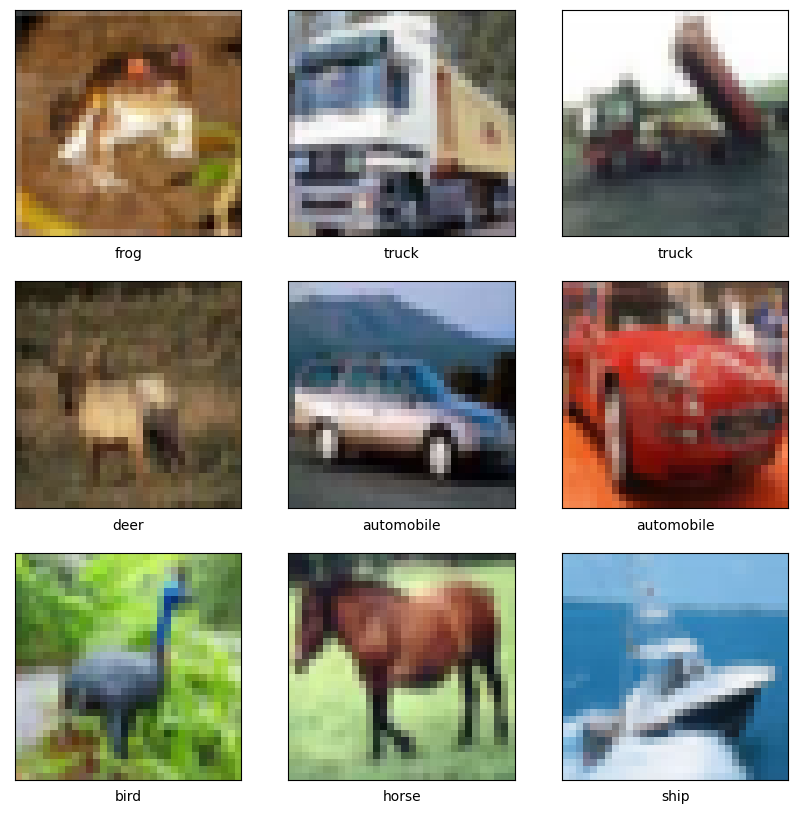

Epoch 1/2
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5151 - accuracy: 0.4479 - val_loss: 1.2526 - val_accuracy: 0.5439
Epoch 2/2
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1437 - accuracy: 0.5942 - val_loss: 1.0479 - val_accuracy: 0.6309
313/313 - 2s - loss: 1.0479 - accuracy: 0.6309 - 2s/epoch - 5ms/step
test_acc: 0.6309000253677368


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255.0, test_images/255.0
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=2,
                   validation_data=(test_images,test_labels))
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('test_acc:',test_acc)